<a href="https://colab.research.google.com/github/sourojita08/CODSOFT/blob/main/CODSOFT__TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Movie Rating Prediction (TASK 2 - CODSOFT)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,mean_absolute_error,r2_score,mean_squared_error

In [2]:
#read dataset
df = pd.read_csv("/content/Movie Rating prediction.csv",encoding='latin')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


Information about the dataset

In [3]:
df.shape

(15509, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [5]:
df.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981.000000,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,NaN,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,NaN,120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,NaN,240,2780,NaN,227,58,158,83,91
mean,NaN,-1987.012215,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,25.416689,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,-2022.000000,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,-2009.000000,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,-1991.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,-1968.000000,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


**Data Cleaning**

In [6]:
#checking for missing values
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [7]:
df.isnull().sum().sum()

33523

In [8]:
#drop
df.dropna(inplace=True)
df.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [9]:
df.shape

(5659, 10)

In [10]:
#checking for duplicate values
df.duplicated().sum()

0

In [11]:
df.drop_duplicates(subset='Name',inplace=True)
df.duplicated().value_counts()

,count
False,5385


In [12]:
#cleaning the year column
#convert 'Year' column to 'str' type
df['Year'] = df['Year'].astype(str)
df['Year'] = df['Year'].str.extract(r'([0-9].{0,3})',expand=False)

In [13]:
#cleaning the duration column
df['Duration'] = df['Duration'].str.extract(r'([0-9]+)', expand=False)

In [14]:
#changing the duration, year, vote column from object to numeric type
df['Duration']=pd.to_numeric(df['Duration'])
df['Year']=pd.to_numeric(df['Year'])

df['Votes']=df['Votes'].str.extract(r'([0-9]+)',expand=False)
df['Votes']=pd.to_numeric(df['Votes'])

In [15]:
df['Duration'].dtype,df['Year'].dtype,df['Votes'].dtype

(dtype('int64'), dtype('int64'), dtype('int64'))

**Data Visualizations (EDA)**

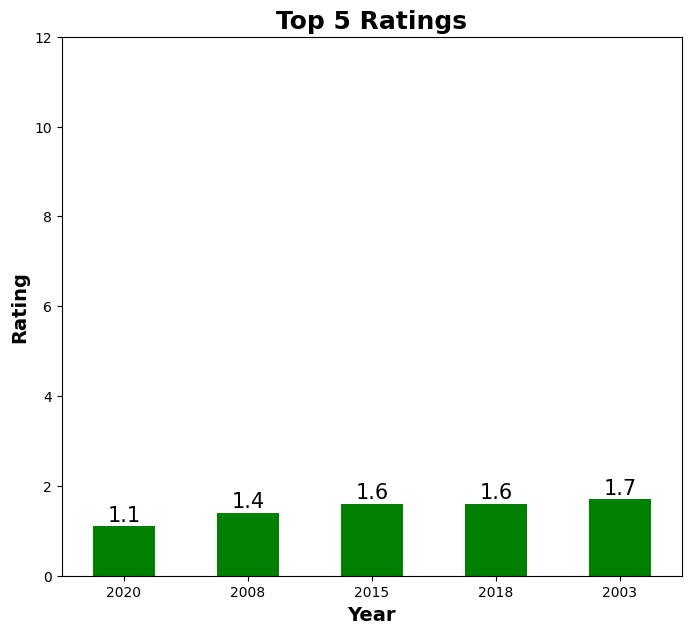

In [16]:
#Plotting Top 5 Rating
top5_rating = df[['Year', 'Rating']].sort_values(by = 'Rating',
                                                    ascending = True).head()
bars = top5_rating.plot(kind = 'bar',
                        x = 'Year',
                        y = 'Rating',
                        color = 'green',
                        legend = None,
                        figsize = (8,7))
plt.xlabel('Year',
           fontsize = 14,
           fontweight = 'bold')
plt.ylabel('Rating',
           fontsize = 14,
           fontweight = 'bold')
plt.title('Top 5 Ratings',
          fontsize = 18,
          fontweight = 'bold')
plt.xticks(rotation = 0)
plt.yticks(np.arange(0, 13, 2))

#Labelling Plot
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.1f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center',
                 va='center',
                 size=15,
                 xytext=(0, 8),
                 textcoords='offset points')

plt.show()

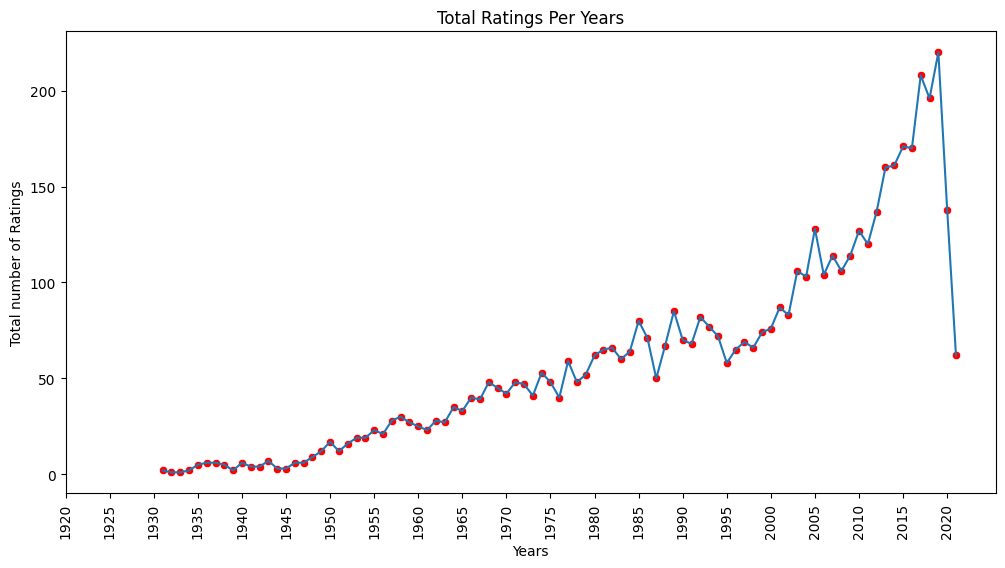

In [17]:
#Years vs number of films rated
rating_sum = df.groupby('Year')['Rating'].count().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Year',y='Rating',data=rating_sum)
sns.scatterplot(x='Year',y='Rating',data=rating_sum,color='r')
plt.xticks(np.arange(1920,2025,5))
plt.ylabel('Total number of Ratings')
plt.xlabel('Years')
plt.title('Total Ratings Per Years')
plt.xticks(rotation=90)
plt.show()

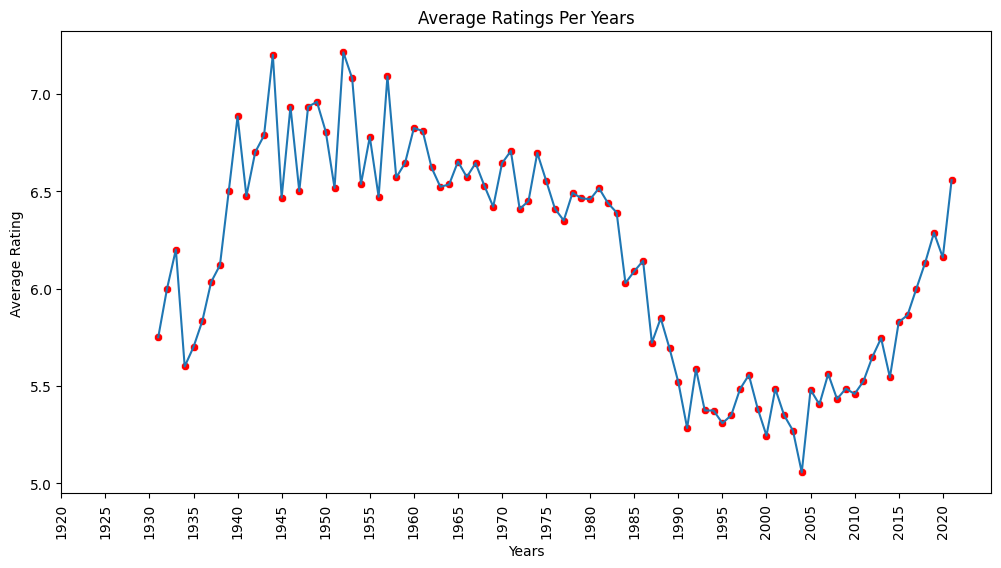

In [18]:
#Year with best average rating
rating_avg = df.groupby('Year')['Rating'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Year',y='Rating',data=rating_avg)
sns.scatterplot(x='Year',y='Rating',data=rating_avg,color='r')
plt.xticks(np.arange(1920,2025,5))
plt.ylabel('Average Rating')
plt.xlabel('Years')
plt.title('Average Ratings Per Years')
plt.xticks(rotation=90)
plt.show()

<ipython-input-19-6df2b49364c6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Director', x='Name', data=top_20_directors, orient='horizontal', palette='magma')


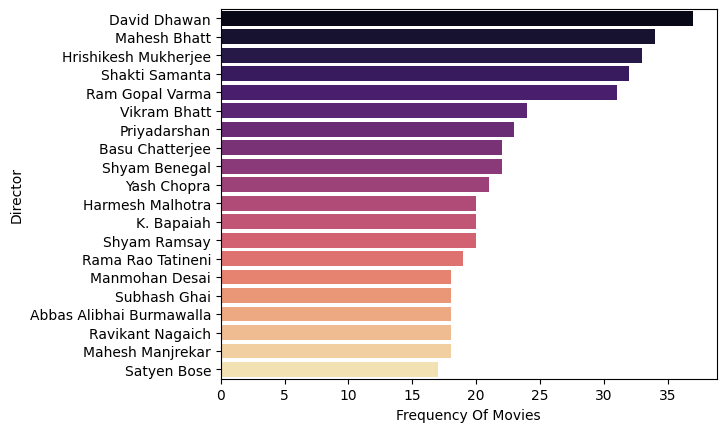

In [19]:
#Top 20 Directors by Frequency of Movies
top_20_directors = df.groupby('Director')['Name'].count().sort_values(ascending=False).head(20).reset_index()

sns.barplot(y='Director', x='Name', data=top_20_directors, orient='horizontal', palette='magma')
plt.xlabel('Frequency Of Movies')
plt.ylabel('Director')
plt.show()

In [20]:
#Top 10 movies according to rating
overall=df.nlargest(10,'Rating')
overall=overall.reset_index(drop=True)
print("Top 10 Movies Overall:")
overall

Top 10 Movies Overall:


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
1,Half Songs,2021,79,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
3,June,2021,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
4,The Reluctant Crime,2020,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
6,Baikunth,2021,72,Family,9.3,29,Vishwa Bhanu,Vishwa Bhanu,Sangam Shukla,Vijay Thakur
7,God of gods,2019,90,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
8,Love Sorries,2021,101,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
9,Refl3ct,2021,65,Sci-Fi,9.3,467,Nikhil Mahar,Vijay Mahar,Vijay Mahar,Nikhil Mahar


<ipython-input-21-5f857fad2342>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Name',x='Rating',orient='horizontal',data=overall,palette='rocket')


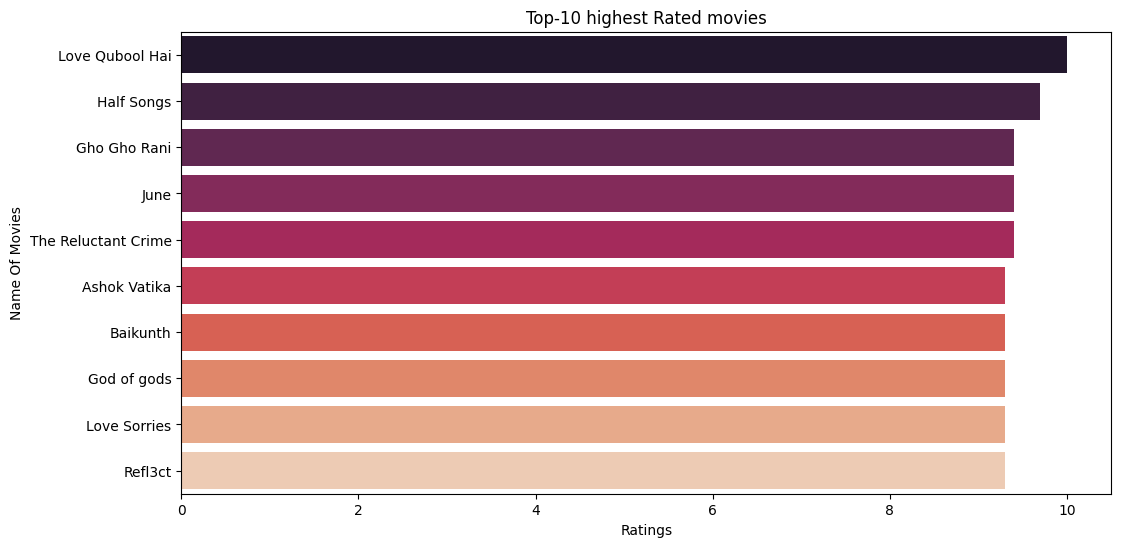

In [21]:
#graph
plt.figure(figsize=(12,6))
sns.barplot(y='Name',x='Rating',orient='horizontal',data=overall,palette='rocket')
plt.title("Top-10 highest Rated movies")
plt.ylabel('Name Of Movies')
plt.xlabel('Ratings')
plt.show()

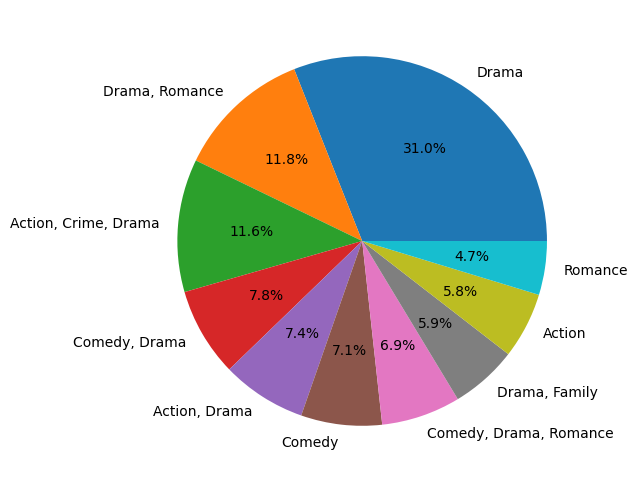

In [22]:
#Most Popular Genres of movies
plt.figure(figsize=(12,6))
df['Genre'].value_counts().sort_values(ascending=False)[:10].plot(kind='pie',autopct="%1.1f%%")
plt.ylabel("")
plt.show()

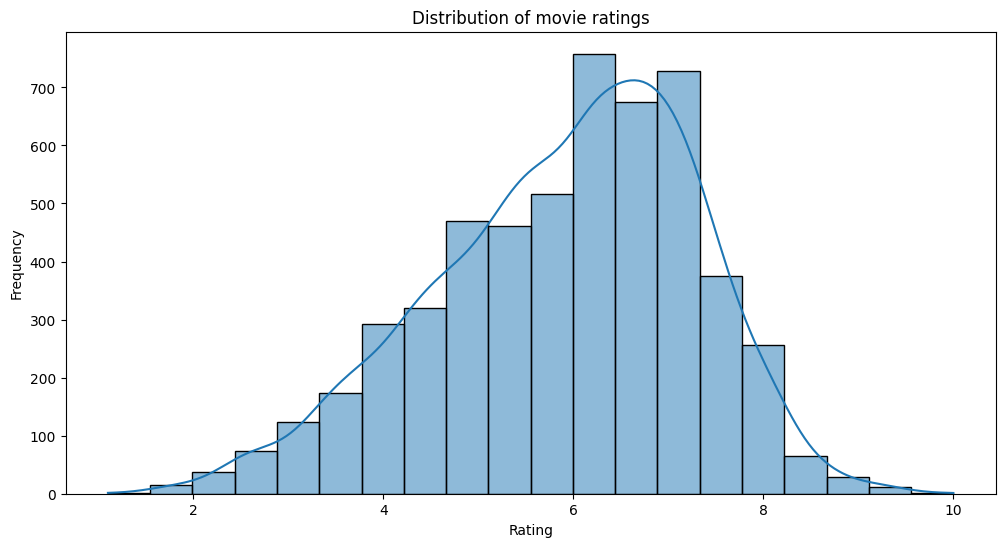

In [23]:
#graph of distribution of movie rating
plt.figure(figsize=(12,6))
sns.histplot(df['Rating'],bins=20,kde=True)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of movie ratings")
plt.show()

In [24]:
actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']]).dropna().value_counts().reset_index()
actors = actors.rename(columns={'index': 'Name', 'count': 'no_of_movies'})

<ipython-input-25-71dd0f6d92e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=actors['Name'][:10],x=actors['no_of_movies'][:10],orient='horizontal',palette='viridis')


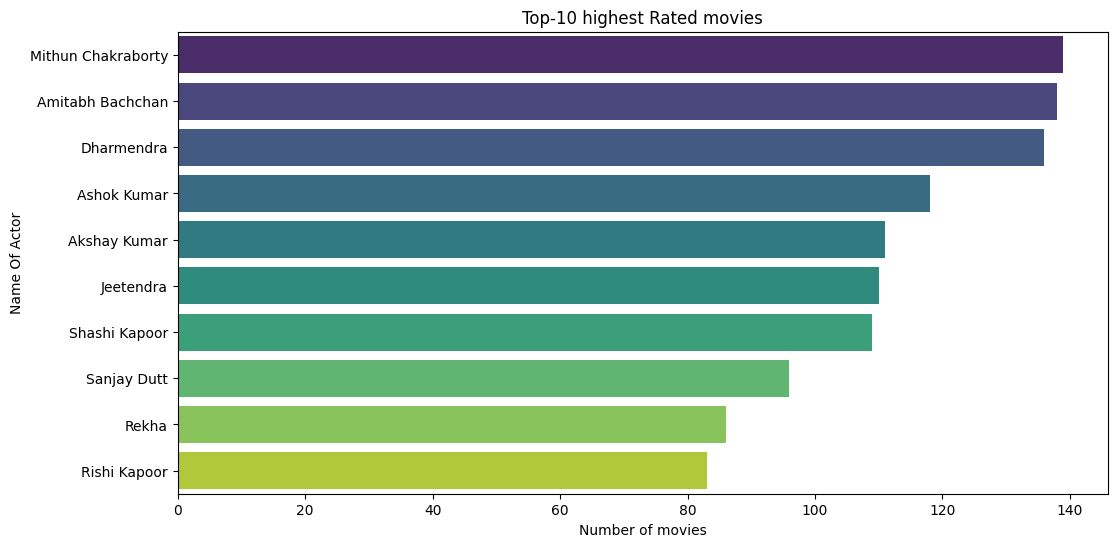

In [25]:
#Actor with most number of movies
plt.figure(figsize=(12,6))
sns.barplot(y=actors['Name'][:10],x=actors['no_of_movies'][:10],orient='horizontal',palette='viridis')
plt.title("Top-10 highest Rated movies")
plt.ylabel('Name Of Actor')
plt.xlabel('Number of movies')
plt.show()

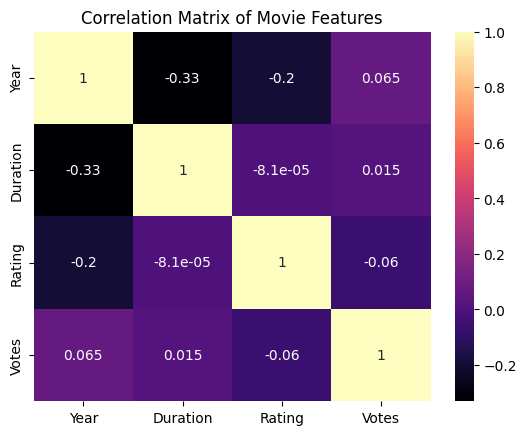

In [26]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True, cmap= 'magma')
plt.title('Correlation Matrix of Movie Features')
plt.show()

**Feature Engineering**

In [27]:
#drop name column, does not impact the outcome
df.drop('Name',axis=1,inplace=True)

In [28]:
#grouping the columns with their aveg rating and creating new feature
genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['genre_mean_rating'] = genre_mean_rating

director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating

actor1_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_encoded'] = actor3_mean_rating

In [29]:
df.columns

Index(['Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3', 'genre_mean_rating', 'Director_encoded',
       'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded'],
      dtype='object')

In [30]:
x = df[['Year', 'Duration', 'Votes', 'genre_mean_rating', 'Director_encoded',
       'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = df['Rating']

In [31]:
print(x)

       Year  Duration  Votes  genre_mean_rating  Director_encoded  \
1      2019       109      8           6.422222          7.000000   
3      2019       110     35           5.724272          4.400000   
5      1997       147    827           6.225000          5.200000   
6      2005       142      1           7.350000          7.383333   
8      2012        82    326           5.477778          5.600000   
...     ...       ...    ...                ...               ...   
15493  2015       115    408           6.422222          6.100000   
15494  2001       153      1           6.886667          7.250000   
15503  1989       125     44           5.772039          6.270000   
15505  1999       129    655           5.545361          5.250000   
15508  1998       130     20           5.545361          4.046154   

       Actor1_encoded  Actor2_encoded  Actor3_encoded  
1            6.850000        7.000000        7.000000  
3            5.420000        4.400000        4.450000  
5  

In [32]:
print(y)

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5385, dtype: float64


In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [34]:
print(x_test)

       Year  Duration  Votes  genre_mean_rating  Director_encoded  \
11512  2019       120      6           5.711538          7.500000   
4834   2004       165     62           5.232394          4.500000   
5391   2015       125      8           5.645946          2.500000   
8877   1984       166     83           5.016667          5.460000   
594    2019       158    858           5.480000          5.275000   
...     ...       ...    ...                ...               ...   
11171  1973       137     11           6.422222          5.500000   
10303  2006        92     20           6.422222          6.300000   
10606  1989       154      3           5.772039          6.514286   
3961   2014       119    986           5.602941          5.200000   
1171   2003        90     11           5.230435          3.400000   

       Actor1_encoded  Actor2_encoded  Actor3_encoded  
11512        7.500000        7.500000        7.500000  
4834         4.600000        5.750000        4.500000  
539

In [35]:
print(y_test)

11512    7.5
4834     4.5
5391     2.5
8877     5.9
594      4.5
        ... 
11171    6.1
10303    6.3
10606    7.8
3961     5.2
1171     3.4
Name: Rating, Length: 1616, dtype: float64


*Building model*

In [36]:
#using Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred= lr.predict(x_test)

#using Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_pred= rf.predict(x_test)

In [37]:
#for Linear Regression
print('Mean Squared error:', mean_squared_error(y_test, lr_pred))
print('Mean Absolute error:', mean_absolute_error(y_test, lr_pred))
print('R2 Score', r2_score(y_test, lr_pred))
print('This is the result by using Linear Regression')

Mean Squared error: 0.43000562685306226
Mean Absolute error: 0.47852973366955714
R2 Score 0.7746102292950271
This is the result by using Linear Regression


In [38]:
#for Random Forest Regressor
print('Mean squared error: ',mean_squared_error(y_test, rf_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, rf_pred))
print('R2 score: ',r2_score(y_test, rf_pred))
print('This is the result by using Random Forest Regressor')

Mean squared error:  0.39315259282178205
Mean absolute error:  0.4164962871287127
R2 score:  0.7939269460340179
This is the result by using Random Forest Regressor
